<a href="https://colab.research.google.com/github/JamesJokDutAkuei/matrix_multiply_lib/blob/main/Group_22_PCA_Formative_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

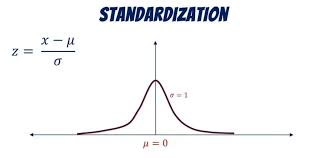


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('queen_loss_africanized_honeybee_dataset.csv')  # Make sure the file is in the current working directory
print("Original Data:")
print(df.head())

Original Data:
         date       zcr    energy  energy_entropy  spectral_centroid  \
0  2019-08-26  0.016508  0.079022        2.969994           0.066924   
1  2019-08-26  0.017323  0.076534        2.994932           0.067089   
2  2019-08-26  0.017079  0.074472        3.010112           0.073893   
3  2019-08-26  0.017148  0.075883        3.031832           0.079952   
4  2019-08-26  0.016648  0.070180        2.981129           0.080176   

   spectral_spread  spectral_entropy  spectral_flux  spectral_rolloff  \
0         0.146160          0.011623       0.020311          0.018265   
1         0.145596          0.009552       0.013383          0.018475   
2         0.154064          0.013531       0.015915          0.018707   
3         0.164990          0.015530       0.015320          0.018405   
4         0.162165          0.018019       0.017983          0.017567   

      mfcc_1  ...    mfcc_5    mfcc_6    mfcc_7    mfcc_8    mfcc_9   mfcc_10  \
0 -24.755411  ... -0.628457 -0.5

In [ ]:
# Step 2: Select only numeric columns for PCA
df_numeric = df.select_dtypes(include=[np.number])


In [ ]:
# Step 3: Compute the mean and standard deviation
mean = np.mean(df_numeric, axis=0)
std = np.std(df_numeric, axis=0)

In [ ]:
# Step 4: Standardize the data
X_std = (df_numeric - mean) / std

print("\nStandardized Data:")
print(X_std.head())


Standardized Data:
        zcr    energy  energy_entropy  spectral_centroid  spectral_spread  \
0 -0.353276  0.802938       -1.568962          -0.810337        -0.954441   
1 -0.258329  0.667316       -1.045329          -0.804606        -0.976600   
2 -0.286813  0.554924       -0.726600          -0.567589        -0.643412   
3 -0.278675  0.631866       -0.270532          -0.356548        -0.213500   
4 -0.336999  0.320973       -1.335163          -0.348746        -0.324658   

   spectral_entropy  spectral_flux  spectral_rolloff    mfcc_1    mfcc_2  ...  \
0         -0.482659       2.222991         -0.223442 -0.785194  0.892301  ...   
1         -0.517779       0.422233         -0.189793 -0.925305  0.862910  ...   
2         -0.450302       1.080321         -0.152405 -0.702712  0.516565  ...   
3         -0.416405       0.925608         -0.201009 -0.436728  0.076263  ...   
4         -0.374188       1.617878         -0.335606 -0.739209  0.053895  ...   

     mfcc_4    mfcc_5    mfcc_

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
# Transpose is needed because np.cov expects features in rows
cov_matrix = np.cov(X_std.T)

print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
[[ 1.00018522 -0.48636817  0.50226043  0.95137675  0.88675142  0.96498825
  -0.7107441   0.7428476   0.57223242 -0.79784921 -0.49218555  0.53071476
   0.11431602 -0.15829441  0.55065008  0.50590723 -0.24492134 -0.61381392
  -0.59589443 -0.45097605 -0.19996662]
 [-0.48636817  1.00018522 -0.36271888 -0.51014975 -0.47276708 -0.52537122
   0.55108256 -0.41474256  0.00555984  0.54213563  0.29782724 -0.50770937
  -0.24799401 -0.08062175 -0.40574875 -0.27477853  0.35844534  0.51677593
   0.42487444  0.25696226  0.02193263]
 [ 0.50226043 -0.36271888  1.00018522  0.52298796  0.51705693  0.48914128
  -0.66121854  0.3794691   0.54428985 -0.57602181 -0.37467713  0.5992813
   0.24126074  0.21400832  0.62631802  0.48347933 -0.33172066 -0.63821635
  -0.60374068 -0.41934203 -0.10079217]
 [ 0.95137675 -0.51014975  0.52298796  1.00018522  0.97631877  0.91883171
  -0.74272     0.62800745  0.62416248 -0.87283827 -0.50068402  0.60752091
   0.12822294 -0.16735842  0.57951588  0.51554202 -

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition

# Display the eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[1.06941677e+01 3.36033106e+00 1.74910863e+00 1.01518720e+00
 9.68363455e-01 7.33990044e-01 4.79949860e-01 4.64366977e-01
 3.48580742e-01 3.01093404e-01 2.37697521e-01 1.88521123e-01
 1.18685625e-01 2.37920414e-03 1.08207365e-02 2.04282120e-02
 4.03871055e-02 4.53019879e-02 6.98600144e-02 7.83015327e-02
 7.63674940e-02]

Eigenvectors:
[[-2.62879747e-01 -7.55334210e-02  3.05005750e-01 -8.83666331e-02
   1.91128792e-02 -1.96876928e-01  1.31359153e-01  3.44376935e-02
  -2.80172167e-02 -1.17427826e-01  6.69392310e-02  8.96901210e-03
   1.90578455e-02  5.94077576e-02 -6.39982523e-01 -1.23191903e-01
   7.38261528e-02 -1.02734062e-01 -3.31470132e-01  3.82581702e-01
   2.16233777e-01]
 [ 1.70669086e-01  1.75810791e-01 -2.50926434e-02  1.84857172e-01
   6.38722824e-01 -4.10253196e-01 -7.62743789e-02  3.94058498e-02
   2.54261221e-02  4.15803628e-02  9.01690006e-02  1.11942241e-01
   5.64371509e-02  3.57404782e-03  5.23027626e-03 -1.40372398e-02
  -4.12735292e-02  1.85604250e-01  1.

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices that would sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]  # Sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors to match

# Display the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)

print("\nSorted Eigenvectors (Principal Components):")
print(sorted_eigenvectors)


Sorted Eigenvalues:
[1.06941677e+01 3.36033106e+00 1.74910863e+00 1.01518720e+00
 9.68363455e-01 7.33990044e-01 4.79949860e-01 4.64366977e-01
 3.48580742e-01 3.01093404e-01 2.37697521e-01 1.88521123e-01
 1.18685625e-01 7.83015327e-02 7.63674940e-02 6.98600144e-02
 4.53019879e-02 4.03871055e-02 2.04282120e-02 1.08207365e-02
 2.37920414e-03]

Sorted Eigenvectors (Principal Components):
[[-2.62879747e-01 -7.55334210e-02  3.05005750e-01 -8.83666331e-02
   1.91128792e-02 -1.96876928e-01  1.31359153e-01  3.44376935e-02
  -2.80172167e-02 -1.17427826e-01  6.69392310e-02  8.96901210e-03
   1.90578455e-02  3.82581702e-01  2.16233777e-01 -3.31470132e-01
  -1.02734062e-01  7.38261528e-02 -1.23191903e-01 -6.39982523e-01
   5.94077576e-02]
 [ 1.70669086e-01  1.75810791e-01 -2.50926434e-02  1.84857172e-01
   6.38722824e-01 -4.10253196e-01 -7.62743789e-02  3.94058498e-02
   2.54261221e-02  4.15803628e-02  9.01690006e-02  1.11942241e-01
   5.64371509e-02  3.65722662e-01 -3.15882995e-01  1.59276032e-01


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = 2  # You can adjust this to any number depending on how much variance you want to retain

# Select the top principal components
top_components = sorted_eigenvectors[:, :num_components]

# Project the data onto the top components
reduced_data = X_std.dot(top_components)

# Show the projected data (first 5 rows)
reduced_data[:5]


,0,1
0,3.025985,1.092989
1,2.381992,2.426759
2,1.912781,2.386799
3,1.523100,1.503891
4,2.515088,0.192586


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (5400, 2)


,0,1
0,3.025985,1.092989
1,2.381992,2.426759
2,1.912781,2.386799
3,1.523100,1.503891
4,2.515088,0.192586


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

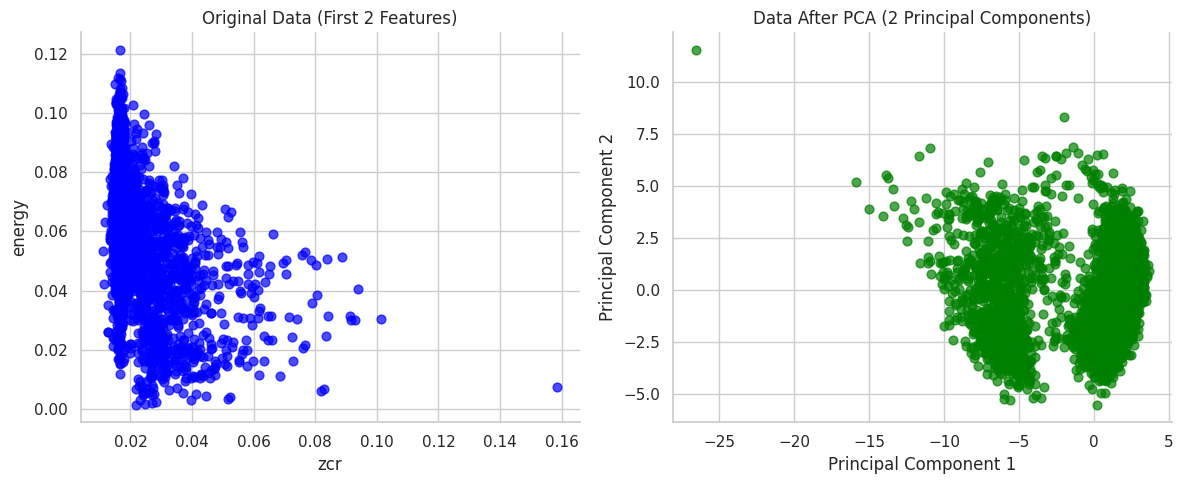

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load the dataset
df = pd.read_csv('queen_loss_africanized_honeybee_dataset.csv')

# 2. (Optional) Drop non-numeric or irrelevant columns (e.g., strings, IDs)
df_numeric = df.select_dtypes(include='number')

# 3. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# 4. Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 5. Convert PCA result into DataFrame (optional, for easier plotting)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# 6. Set seaborn style
sns.set(style="whitegrid")

# 7. Plot: Before PCA (First 2 original features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], s=40, alpha=0.7, color='blue')
plt.title('Original Data (First 2 Features)')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.gca().spines[['top', 'right']].set_visible(False)

# 8. Plot: After PCA (First 2 Principal Components)
plt.subplot(1, 2, 2)
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=40, alpha=0.7, color='green')
plt.title('Data After PCA (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Display both plots
plt.tight_layout()
plt.show()
